<a href="https://colab.research.google.com/github/kiplangat-david/DSC12/blob/main/DSC_12_IPWEEK2_Kiplangat_David.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

# **Analytic Question**

Which individuals are most likely to have or use a bank account

# **Metric for Success**

Household size with Bank accounts

##  Reading the Data

In [75]:
#imprting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
#loading data
df = pd.read_csv('/content/Financial Dataset - 1.csv')

##  Checking the Data

In [77]:
# Determining the no. of records in our dataset
#
df.shape

(23524, 13)

In [78]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [79]:
# Previewing the bottom of our dataset
# 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [80]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## External Data Source Validation

# Data is valid. It matches https://zindi.africa/competitions/financial-inclusion-in-africa/data from Zindi Africa


**# DATA CLEANING**

In [81]:
#drop unnecessary columns
df.drop(['uniqueid'],axis=1, inplace=True)

In [82]:
df.drop(['The relathip with head'],axis=1, inplace=True)

In [83]:
df.head(2)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent


In [84]:
#rename columns
df.columns =['country',	'year',	'has_bank_account',	'location_type',	'cell_phone_access',	'household_size',	'respondent_age',	'gender_of_respondent',	'marital_status', 'education_level', 'job_type']


In [85]:
#check if columns were correctly renamed
df.head(2)

,country,year,has_bank_account,location_type,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


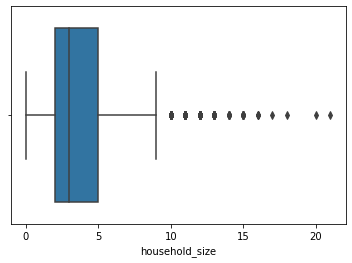

In [86]:
# Checking for Outliers
#household size
sns.boxplot(df['household_size'])

The dots represents outliers. Household_size contains outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


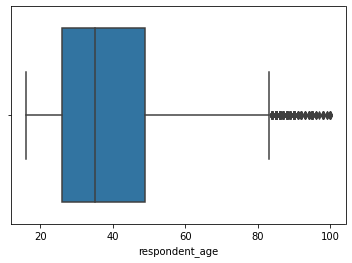

In [87]:
#checking for age outliers 
sns.boxplot(df['respondent_age'])

ages of respondents also have outliers

In [ ]:
#checking for anomalies
#most columns contain 'nan' as anomalies which will be dropped


In [88]:

df.country.unique()

array(['Kenya', 'Rwanda', 'Tanzania', nan, 'Uganda'], dtype=object)

In [89]:
df.has_bank_account.unique()

array(['Yes', 'No', nan], dtype=object)

In [90]:
df.location_type.unique()

array(['Rural', 'Urban', nan], dtype=object)

In [91]:
df.gender_of_respondent.unique()

array(['Female', 'Male', nan], dtype=object)

In [92]:
df.respondent_age.unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        nan,  93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,
        94.,  87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

In [93]:
df.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [339]:
#dealing with year anomalies
#drop 2029,2056,2039

anomaly = df[df['year'] > 2018].index
df
df = df.drop(anomaly)
df['year'].unique()

array([2018, 2016, 2017])

In [95]:
# Identifying the Missing Data
#
df.isnull().sum()

country                 14
year                     0
has_bank_account        36
location_type           15
cell_phone_access       11
household_size          28
respondent_age          34
gender_of_respondent    34
marital_status          32
education_level         29
job_type                30
dtype: int64

The data contains missing values which will be dropped

In [96]:
# Dealing with the Missing Data
#drop missing values
df.dropna(inplace=True)

In [97]:
#check if missing values were dropped
df.isnull().sum()

country                 0
year                    0
has_bank_account        0
location_type           0
cell_phone_access       0
household_size          0
respondent_age          0
gender_of_respondent    0
marital_status          0
education_level         0
job_type                0
dtype: int64

zeros shows that missing values were actuually dropped

In [98]:
# check duplicates
#
df.duplicated().sum()

4931

I chose to retain duplicates because they are significant in our study

# **`EXPLORATORY ANALYSIS`**

# `**(i) UNIVARIATE ANALYSIS**`

***Measures of central tendency***

In [151]:
#household_size mean
df['household_size'].mean()


3.688560411311054

In [152]:
#respondent_age mean
df['respondent_age'].mean()

38.80706940874036

In [153]:
#county mode
df['country'].mode()

0    Rwanda
dtype: object

In [154]:
#year mode
df['year'].mode()

0    2016
dtype: int64

In [104]:
#has bank account mode
df['has_bank_account'].mode()

0    No
dtype: object

In [155]:
#location type mode
df['location_type'].mode()

0    Rural
dtype: object

In [156]:
#respondent age mode
df['respondent_age'].mode()

0    30.0
dtype: float64

In [157]:
#gender of respondent mode
df['gender_of_respondent'].mode()

0    Female
dtype: object

In [158]:
#marital status mode
df['marital_status'].mode()

0    Married/Living together
dtype: object

In [159]:
#education level mode
df['education_level'].mode()

0    Primary education
dtype: object

In [160]:
#job type mode
df.job_type.mode()

0    Self employed
dtype: object

In [111]:
#median()
df.median()


year              2017.0
household_size       3.0
respondent_age      35.0
dtype: float64

***Measures of Dispesion***

In [112]:
#range of household size column
maxhousehold = df.household_size.max()
minhousehold = df.household_size.min()
range = maxhousehold - minhousehold
range

21.0

In [113]:

#range of Age column
maxage = df.respondent_age.max()
minage = df.respondent_age.min()
range = maxage - minage
range

84.0

In [114]:
#variance
df.var()

year                0.721031
household_size      5.204214
respondent_age    272.907247
dtype: float64

In [115]:
#standard deviation
df.std()

year               0.849136
household_size     2.281275
respondent_age    16.519905
dtype: float64

In [116]:
#sskewness
df.skew()

year              0.042833
household_size    0.974183
respondent_age    0.840615
dtype: float64

The data is slighly skewed positively which also portrays normal distribution

In [117]:
#kurtosis
df.kurt()

year             -1.611829
household_size    1.153836
respondent_age    0.098268
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


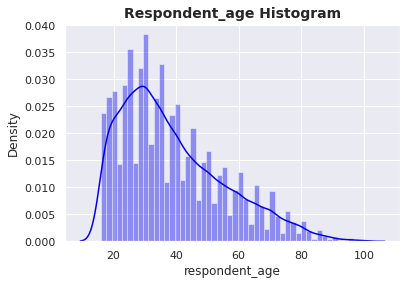

In [180]:
#histogram displaying the column Age

sns.distplot(df['respondent_age'], kde=True)
plt.title('Respondent_age Histogram',weight='bold',fontsize=14)
sns.set_context('talk')
sns.set_theme(palette='flag_r')


The distribution is right skewed but still portray normal distribution

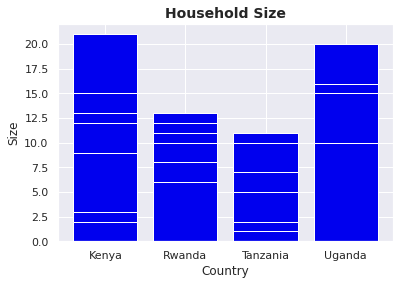

In [195]:
#bar chart displaying the column household size
plt.bar(df['country'],df['household_size'])
plt.title('Household Size',fontsize=14, weight='bold')
plt.xlabel('Country')
plt.ylabel('Size')
sns.set_theme(context='paper', palette='flag_r')




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


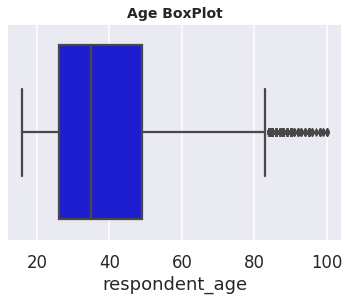

In [182]:
#Boxplot displaying the column age
#The data is tightly grouped
#There are presence of outliers in the column that were retained since they proved useful

sns.boxplot(df['respondent_age'])
plt.title("Age BoxPlot", weight='bold', fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Household size boxplot')

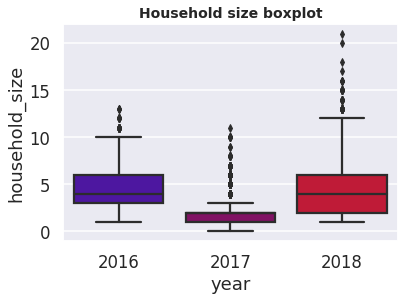

In [267]:
#Boxplot showing relationship between year and household sizes

sns.boxplot(df['year'],df['household_size'])
plt.title('Household size boxplot',weight='bold',fontsize=14)
#plt.xticks(rotation=45)
#plt.xticks(np.arange(min(year), max(year)+1, 1.0))
#plt.show()

In [122]:
#frequency table of the respondent age
df.respondent_age.value_counts()

30.0     1043
35.0      831
25.0      785
28.0      742
32.0      707
         ... 
100.0       5
93.0        4
96.0        3
99.0        2
97.0        1
Name: respondent_age, Length: 85, dtype: int64

In [123]:
#frequency table of  household size column
df.household_size.value_counts()

2.0     5072
1.0     3928
3.0     3513
4.0     3199
5.0     2716
6.0     2028
7.0     1378
8.0      740
9.0      354
10.0     191
12.0      66
11.0      66
0.0       36
13.0      25
15.0      11
14.0       9
16.0       4
18.0       1
20.0       1
21.0       1
17.0       1
Name: household_size, dtype: int64

In [124]:
#frequency table of the year 
df.year.value_counts()

2016    8683
2018    8157
2017    6500
Name: year, dtype: int64

# **`(ii) BIVARIATE ANALYSIS`**

> Indented block



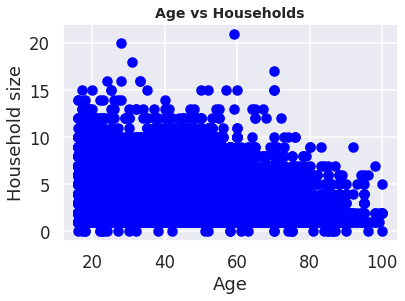

In [269]:
#scatter plot 
#Age vs household size
plt.scatter(df['respondent_age'],df['household_size'],color='b')
plt.title('Age vs Households',weight='bold',fontsize=14)
plt.xlabel("Age")
plt.ylabel("Household size")

plt.show()


The distribution is inclined more to the young people as compared to the old people

Text(0.5, 1.0, 'cell phones vs households')

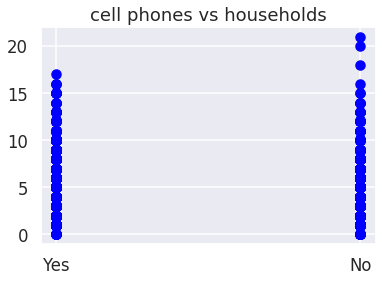

In [275]:
#scatter plot showing relatinship between
#cell phone access and household size
plt.scatter(df['cell_phone_access'],df['household_size'],label='size',color='b')
plt.title('cell phones vs households')

a greater number of people living in households has no cell_phone access

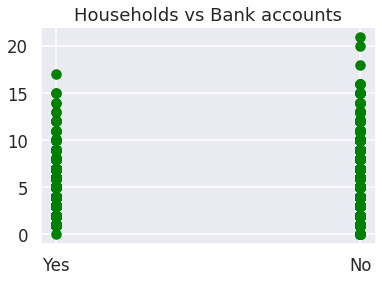

In [324]:
#scatter
#bank account vs households
plt.scatter(df['has_bank_account'],df['household_size'], color='green')
plt.title('Households vs Bank accounts')

plt.show()

Fewer number of households have bank accounts compared to those who don't have

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

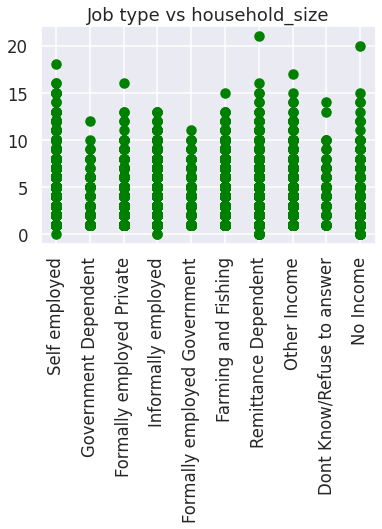

In [328]:
#scatter
#job type vs households
plt.scatter(df['job_type'],df['household_size'], color='green')
plt.title('Job type vs household_size')
plt.xticks(rotation=90)


There are relatively fewer government dependent and those formally employed by the goverment compared to other job types in the households

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

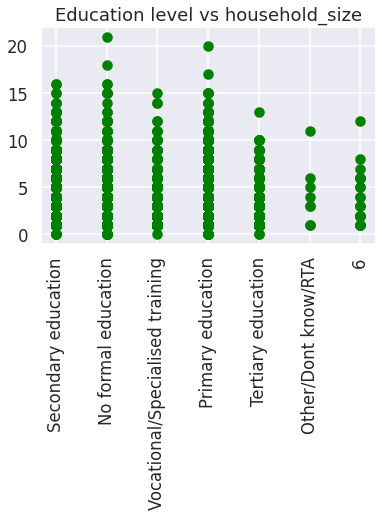

In [330]:
#scatter
#education level vs households
plt.scatter(df['education_level'],df['household_size'], color='green')
plt.title('Education level vs household_size')
plt.xticks(rotation=90)

In [331]:
df['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

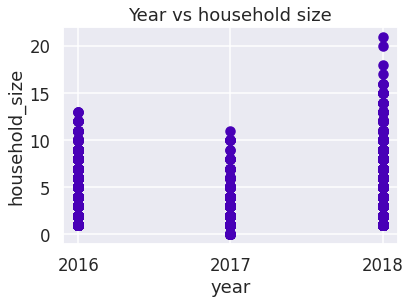

In [322]:
#year vs household size
plt.scatter(df["year"],df["household_size"])
plt.title("Year vs household size")
plt.xlabel('year')
plt.ylabel("household_size")
plt.xticks(np.arange(min(year), max(year)+1, 1.0))
plt.show()


There exist a decrease in household size from 2016 to 2017 , but the number showed a steady increse in the year 2018.

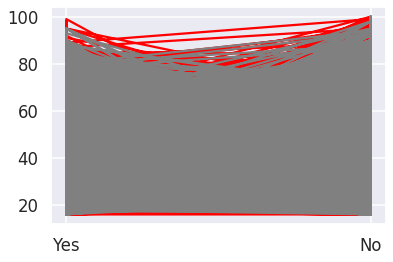

In [286]:
#line chart showing relationship between
#cellphone acess & respondent age
#bank account & respondent age
plt.plot(df['cell_phone_access'],df['respondent_age'], color='r')
plt.plot(df['has_bank_account'],df['respondent_age'],color='grey')

In [130]:
#correlation between age and household size variables
corr = df["respondent_age"].corr(df["household_size"],method = "pearson")
corr



-0.11967115234154871

low degree of corelation

In [131]:
#correlation between year and household size variables
corr = df["year"].corr(df["household_size"],method = "pearson")
corr

-0.05248406515317324

weak correlation

([<matplotlib.axis.XTick at 0x7fcea93e6750>,
 <a list of 3 Text major ticklabel objects>)

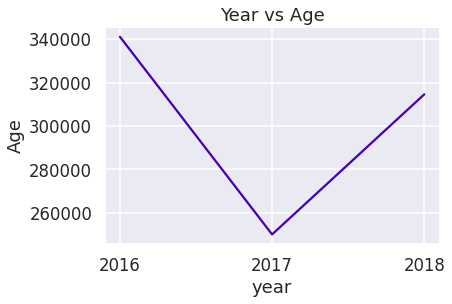

In [292]:
#line chart
#year vs respondent age
var = df.groupby('year').respondent_age.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Age')
ax1.set_title("Year vs Age")
var.plot(kind='line')
plt.xticks(np.arange(min(year), max(year)+1, 1.0))

# **`(iii) MULTIVARIATE ANALYSIS`**

# ***`(a) PRINCIPAL COMPONENT ANALYSIS (PCA)`***

In [133]:
#Creating Dummy Variables-numerical variable for pca analysis
dummy = pd.get_dummies(df)
dummy.head()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,has_bank_account_No,has_bank_account_Yes,location_type_Rural,location_type_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,3.0,24.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [134]:
pd.get_dummies(df)

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,has_bank_account_No,has_bank_account_Yes,location_type_Rural,location_type_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,3.0,24.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,4.0,48.0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23520,2018,2.0,27.0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
23521,2018,5.0,27.0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
23522,2018,7.0,30.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [135]:
dummy.shape

(23340, 37)

In [136]:
#Preprocessing
#Dividing my features into the feature set and corresponding labels: X and Y respectively.
x = df.drop("has_bank_account",1)
y = df["has_bank_account"]
x.head()

,country,year,location_type,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,education_level,job_type
0,Kenya,2018,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [137]:
x.shape

(23340, 10)

In [138]:
y.shape

(23340,)

In [139]:
#creating dummy for the categorical data
x = pd.get_dummies(x)
x.head(2)

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [140]:
#splitting the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train, x_test, y_train, y_test

(       year  ...  job_type_Self employed
 17830  2017  ...                       0
 3581   2018  ...                       0
 23242  2018  ...                       0
 16976  2017  ...                       1
 3914   2018  ...                       0
 ...     ...  ...                     ...
 19882  2017  ...                       0
 10126  2016  ...                       0
 23371  2018  ...                       1
 7061   2016  ...                       0
 6204   2016  ...                       0
 
 [17505 rows x 35 columns],        year  ...  job_type_Self employed
 5158   2018  ...                       0
 5566   2018  ...                       0
 15326  2017  ...                       0
 13228  2016  ...                       1
 1665   2018  ...                       1
 ...     ...  ...                     ...
 18045  2017  ...                       1
 6465   2016  ...                       0
 21792  2018  ...                       0
 18541  2017  ...                       1
 1253

In [141]:
#Perform Feature Scaling#standardisation
#As you can see in the dataset, all values are not in the same range. And that requires a lot of time for calculation. So to overcome this problem, we perform feature scaling.

#Feature scaling help us to normalize the data within a particular range.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_test
x_train

array([[ 0.0217376 , -1.17497931, -1.38193638, ..., -0.2185507 ,
        -0.34220278, -0.61298175],
       [ 1.1998078 ,  1.02208239, -0.53689156, ..., -0.2185507 ,
        -0.34220278, -0.61298175],
       [ 1.1998078 , -0.73556697, -1.26121569, ..., -0.2185507 ,
        -0.34220278, -0.61298175],
       ...,
       [ 1.1998078 ,  4.97679344, -0.23508983, ..., -0.2185507 ,
        -0.34220278,  1.63136995],
       [-1.1563326 , -0.29615463, -0.89905362, ..., -0.2185507 ,
        -0.34220278, -0.61298175],
       [-1.1563326 , -0.29615463, -0.95941397, ..., -0.2185507 ,
        -0.34220278, -0.61298175]])

In [142]:
#Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_train
x_test

array([[ 8.18057426e-02,  1.71621647e+00,  2.07274880e+00, ...,
        -8.82307284e-16, -2.71652662e-16,  6.24379775e-16],
       [ 9.94192984e-01,  7.97655199e-02,  1.38342137e+00, ...,
         9.63438494e-16,  1.97808815e-17,  3.21291058e-16],
       [ 2.34059322e+00, -2.58863713e-01, -1.06174145e+00, ...,
        -8.00665245e-18, -2.30019299e-16,  4.30578637e-16],
       ...,
       [ 2.23833100e-01,  3.10901764e+00,  4.03837537e+00, ...,
        -8.00665245e-18,  5.74892394e-16, -7.08755216e-16],
       [ 1.89024958e+00, -1.26804410e+00, -1.99153796e+00, ...,
         5.81807916e-16, -5.92859509e-17, -7.35858485e-16],
       [-1.65259519e+00, -1.44533575e+00, -1.21209261e+00, ...,
        -2.50859353e-16, -1.14797102e-16, -2.58809529e-16]])

In [143]:
#Explained Variance Ratio
#returns the variance caused by each of the principal components.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.17822678e-01, 8.09074997e-02, 7.19685677e-02, 5.44844890e-02,
       5.39049011e-02, 4.81237434e-02, 4.38683641e-02, 4.03034171e-02,
       3.76413667e-02, 3.46449463e-02, 3.26273458e-02, 3.05396587e-02,
       2.99122702e-02, 2.90703643e-02, 2.89068820e-02, 2.85245701e-02,
       2.84883817e-02, 2.80603759e-02, 2.76373952e-02, 2.70977458e-02,
       2.53552637e-02, 2.33215976e-02, 2.06567735e-02, 1.81394825e-02,
       1.39015697e-02, 1.26747940e-02, 1.14155561e-02, 1.71324807e-31,
       1.25796381e-32, 5.96535976e-33, 3.97095322e-33, 2.31833875e-33,
       1.07731816e-33, 7.25569040e-34, 1.12498852e-34])

In [144]:
#Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [145]:
#training and making prediction
#we use random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [146]:
 #Predict the Test Set Results
y_pred = rfc.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [147]:
#Make the Confusion Matrix
#to explain predicted values
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[4797  234]
 [ 606  198]]


0.8560411311053985

It has an accuracy of 85.60%

# ***`(b) FACTOR ANALYSIS`***

In [293]:
df.head()

,country,year,has_bank_account,location_type,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [294]:
#get dummy data
dummy = pd.get_dummies(df)

In [295]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   year                                             23340 non-null  int64  
 1   household_size                                   23340 non-null  float64
 2   respondent_age                                   23340 non-null  float64
 3   country_Kenya                                    23340 non-null  uint8  
 4   country_Rwanda                                   23340 non-null  uint8  
 5   country_Tanzania                                 23340 non-null  uint8  
 6   country_Uganda                                   23340 non-null  uint8  
 7   has_bank_account_No                              23340 non-null  uint8  
 8   has_bank_account_Yes                             23340 non-null  uint8  
 9   location_type_Rural         

In [297]:
#perform adequacy test
#Use Bartlett’s test
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(dummy)
chi_square_value, p_value


/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:188: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

In [298]:
# 
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(dummy)

/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:50: RuntimeWarning: invalid value encountered in sqrt
  Is = np.sqrt(1 / np.diag(m))


In [299]:
#choose numbe of factors
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(dummy, 36, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,4.123830e+00
1,3.364115e+00
2,2.529230e+00
3,2.163878e+00
4,1.881439e+00
5,1.721628e+00
6,1.564861e+00
7,1.446797e+00
8,1.362723e+00
9,1.298371e+00


#  31-factors eigenvalues are greater than one. 
# so we are choosing 31 factors (or unobserved variables).

In [301]:
#Performing Factor Analysis
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(dummy, 31, rotation="varimax")
fa.loadings


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,Factor21,Factor22,Factor23,Factor24,Factor25,Factor26,Factor27,Factor28,Factor29,Factor30,Factor31
year,-0.102428,0.050082,0.952480,-0.013494,0.001798,0.044139,0.239732,0.038055,0.005359,0.051027,0.006302,0.043751,0.014452,0.008415,0.034579,0.008056,0.045413,-0.005931,0.007431,-0.020311,-0.002410,0.028899,0.029705,0.010224,-0.019300,-0.076001,0.000932,0.0,0.0,0.0,0.0
household_size,0.178516,-0.022819,-0.051472,-0.169958,-0.006158,0.047636,0.115607,-0.046989,-0.090982,0.013189,0.171417,-0.015772,-0.006508,0.005000,-0.037730,-0.007536,0.019291,0.000340,0.004149,0.006882,-0.020431,0.019180,-0.048232,-0.042817,0.442094,0.060953,0.178979,0.0,0.0,0.0,0.0
respondent_age,0.025050,0.037344,0.012749,0.489121,-0.052654,-0.134394,-0.043982,0.068126,-0.080085,0.085408,0.187762,-0.031518,-0.001861,-0.002851,-0.047985,0.004834,-0.010295,0.019073,0.008038,0.239462,0.110247,-0.045465,-0.042208,-0.068955,-0.093153,0.055078,-0.187372,0.0,0.0,0.0,0.0
country_Kenya,-0.000534,0.107324,0.838976,0.032809,-0.007752,0.082638,-0.339628,-0.041679,-0.024629,-0.030253,0.074809,0.044350,0.052520,-0.021906,-0.057238,0.015500,-0.041887,-0.008230,0.013119,0.001158,0.003142,0.079717,0.020903,-0.011600,0.346215,0.086645,-0.066787,0.0,0.0,0.0,0.0
country_Rwanda,0.209883,-0.014841,-0.827509,0.039192,0.007091,0.008610,-0.176917,-0.090366,-0.032528,-0.065636,0.093488,-0.029989,0.008694,0.003102,-0.052716,-0.002222,-0.010602,0.008608,-0.004198,0.027277,0.001387,-0.016981,-0.026621,-0.038094,0.427252,0.142258,-0.059069,0.0,0.0,0.0,0.0
country_Tanzania,-0.258598,-0.062863,-0.019684,-0.058958,-0.018696,-0.102180,-0.072585,0.122793,0.059997,0.044888,-0.213549,-0.018203,-0.046125,-0.022631,0.048182,-0.010469,-0.063160,-0.007330,-0.005022,-0.020349,0.001574,-0.018123,0.001139,0.062785,-0.884832,-0.162822,0.125620,0.0,0.0,0.0,0.0
country_Uganda,0.051452,-0.040959,0.143149,-0.024143,0.029223,0.018911,0.933992,0.024177,-0.001302,0.087003,0.062046,0.011223,-0.022935,0.063848,0.101386,-0.003604,0.181232,0.009563,-0.005150,-0.015991,-0.009634,-0.065154,0.011164,-0.016250,0.134034,-0.118131,0.005338,0.0,0.0,0.0,0.0
has_bank_account_No,0.042405,-0.973479,-0.060098,0.001404,0.055780,-0.050988,0.021122,0.100984,0.009576,-0.029160,-0.029671,-0.076357,-0.077291,0.001454,0.017072,-0.001567,-0.009741,-0.002569,-0.011204,0.018758,-0.009192,0.015310,-0.079372,-0.081484,-0.017175,0.003231,0.002552,0.0,0.0,0.0,0.0
has_bank_account_Yes,-0.042405,0.973479,0.060098,-0.001404,-0.055780,0.050988,-0.021122,-0.100984,-0.009576,0.029160,0.029671,0.076357,0.077291,-0.001454,-0.017072,0.001567,0.009741,0.002569,0.011204,-0.018758,0.009192,-0.015310,0.079372,0.081484,0.017175,-0.003231,-0.002552,0.0,0.0,0.0,0.0
location_type_Rural,0.967076,-0.043765,-0.107892,0.025172,0.004335,-0.018741,0.022028,-0.037029,0.000072,-0.016688,0.095862,-0.013241,-0.016064,0.006192,-0.011136,-0.002837,-0.008306,-0.001619,-0.002803,0.022191,0.001584,-0.015093,-0.017492,-0.020481,0.162196,0.089088,0.002056,0.0,0.0,0.0,0.0


In [302]:
#Performing factor analysis for 31 factors
# 
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer()
fa.analyze(dummy, 31, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,Factor21,Factor22,Factor23,Factor24,Factor25,Factor26,Factor27,Factor28,Factor29,Factor30,Factor31
year,-0.102428,0.050082,0.952480,-0.013494,0.001798,0.044139,0.239732,0.038055,0.005359,0.051027,0.006302,0.043751,0.014452,0.008415,0.034579,0.008056,0.045413,-0.005931,0.007431,-0.020311,-0.002410,0.028899,0.029705,0.010224,-0.019300,-0.076001,0.000932,0.0,0.0,0.0,0.0
household_size,0.178516,-0.022819,-0.051472,-0.169958,-0.006158,0.047636,0.115607,-0.046989,-0.090982,0.013189,0.171417,-0.015772,-0.006508,0.005000,-0.037730,-0.007536,0.019291,0.000340,0.004149,0.006882,-0.020431,0.019180,-0.048232,-0.042817,0.442094,0.060953,0.178979,0.0,0.0,0.0,0.0
respondent_age,0.025050,0.037344,0.012749,0.489121,-0.052654,-0.134394,-0.043982,0.068126,-0.080085,0.085408,0.187762,-0.031518,-0.001861,-0.002851,-0.047985,0.004834,-0.010295,0.019073,0.008038,0.239462,0.110247,-0.045465,-0.042208,-0.068955,-0.093153,0.055078,-0.187372,0.0,0.0,0.0,0.0
country_Kenya,-0.000534,0.107324,0.838976,0.032809,-0.007752,0.082638,-0.339628,-0.041679,-0.024629,-0.030253,0.074809,0.044350,0.052520,-0.021906,-0.057238,0.015500,-0.041887,-0.008230,0.013119,0.001158,0.003142,0.079717,0.020903,-0.011600,0.346215,0.086645,-0.066787,0.0,0.0,0.0,0.0
country_Rwanda,0.209883,-0.014841,-0.827509,0.039192,0.007091,0.008610,-0.176917,-0.090366,-0.032528,-0.065636,0.093488,-0.029989,0.008694,0.003102,-0.052716,-0.002222,-0.010602,0.008608,-0.004198,0.027277,0.001387,-0.016981,-0.026621,-0.038094,0.427252,0.142258,-0.059069,0.0,0.0,0.0,0.0
country_Tanzania,-0.258598,-0.062863,-0.019684,-0.058958,-0.018696,-0.102180,-0.072585,0.122793,0.059997,0.044888,-0.213549,-0.018203,-0.046125,-0.022631,0.048182,-0.010469,-0.063160,-0.007330,-0.005022,-0.020349,0.001574,-0.018123,0.001139,0.062785,-0.884832,-0.162822,0.125620,0.0,0.0,0.0,0.0
country_Uganda,0.051452,-0.040959,0.143149,-0.024143,0.029223,0.018911,0.933992,0.024177,-0.001302,0.087003,0.062046,0.011223,-0.022935,0.063848,0.101386,-0.003604,0.181232,0.009563,-0.005150,-0.015991,-0.009634,-0.065154,0.011164,-0.016250,0.134034,-0.118131,0.005338,0.0,0.0,0.0,0.0
has_bank_account_No,0.042405,-0.973479,-0.060098,0.001404,0.055780,-0.050988,0.021122,0.100984,0.009576,-0.029160,-0.029671,-0.076357,-0.077291,0.001454,0.017072,-0.001567,-0.009741,-0.002569,-0.011204,0.018758,-0.009192,0.015310,-0.079372,-0.081484,-0.017175,0.003231,0.002552,0.0,0.0,0.0,0.0
has_bank_account_Yes,-0.042405,0.973479,0.060098,-0.001404,-0.055780,0.050988,-0.021122,-0.100984,-0.009576,0.029160,0.029671,0.076357,0.077291,-0.001454,-0.017072,0.001567,0.009741,0.002569,0.011204,-0.018758,0.009192,-0.015310,0.079372,0.081484,0.017175,-0.003231,-0.002552,0.0,0.0,0.0,0.0
location_type_Rural,0.967076,-0.043765,-0.107892,0.025172,0.004335,-0.018741,0.022028,-0.037029,0.000072,-0.016688,0.095862,-0.013241,-0.016064,0.006192,-0.011136,-0.002837,-0.008306,-0.001619,-0.002803,0.022191,0.001584,-0.015093,-0.017492,-0.020481,0.162196,0.089088,0.002056,0.0,0.0,0.0,0.0


In [303]:
#  Getting variance of each factors
# 
fa.get_factor_variance()

# 96% cumulative Variance explained by the 31factors.

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,Factor21,Factor22,Factor23,Factor24,Factor25,Factor26,Factor27,Factor28,Factor29,Factor30,Factor31
SS Loadings,2.166546,2.070901,2.412079,1.484674,2.032451,1.384509,1.183485,2.044761,1.153097,1.321009,1.695150,1.043036,1.011872,1.004302,1.038538,0.995780,1.069562,0.997619,0.995613,1.453816,1.014194,1.135699,1.042814,1.071241,1.581401,1.169427,0.101018,0.000000,0.000000,0.000000,0.000000
Proportion Var,0.058555,0.055970,0.065191,0.040126,0.054931,0.037419,0.031986,0.055264,0.031165,0.035703,0.045815,0.028190,0.027348,0.027143,0.028069,0.026913,0.028907,0.026963,0.026908,0.039292,0.027411,0.030695,0.028184,0.028952,0.042741,0.031606,0.002730,0.000000,0.000000,0.000000,0.000000
Cumulative Var,0.058555,0.114526,0.179717,0.219843,0.274774,0.312193,0.344180,0.399443,0.430608,0.466311,0.512126,0.540316,0.567664,0.594807,0.622876,0.649789,0.678696,0.705659,0.732567,0.771859,0.799270,0.829965,0.858149,0.887101,0.929842,0.961448,0.964178,0.964178,0.964178,0.964178,0.964178


# ***(c) DISCRIMINANT ANALYSIS***

In [304]:
df.head()

,country,year,has_bank_account,location_type,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [305]:
#divide dataset into labels and features
X = df.iloc[:, 6:7].values
from sklearn.preprocessing import normalize
X = normalize(X)
y = df.iloc[:, 8:].values
X

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [306]:
# divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [307]:
# Step 5: Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [309]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [311]:
#training and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [357]:
#evaluating performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
#print('Accuracy' + str(accuracy_score(y_test, y_pred)))

ValueError: ignored

## Implementing the Solution

1. A big percentage of households had different job occupations other than government dependent and government formal employments

2. A big percentage of the surveyed households have acquired education less than tertiary education level

 These accounts for high number of households without bank accounts.
 Maybe big percentage of the informally employed households have not opened bank accoun

##  Challenging the solution

Knowing exactly occupation and education level of housseholds with bank accounts will be more insightful.

Other factors such as households' income are important






## Follow up questions

The research question was right. The data for this research had insufficient information. More information is required to trickle down the research question

